Dread it
Run From it
Destiny still Arrives

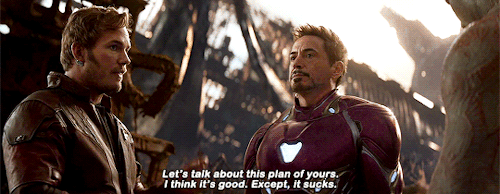

In [1]:
from IPython.display import Image

with open('little_one.gif','rb') as f:
    display(Image(data=f.read(), format='png'))

Example done from https://bigdata-madesimple.com/how-to-run-linear-regression-in-python-scikit-learn/

In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
import sklearn
import scipy.stats as stats
import matplotlib.pyplot as plot


In [3]:
from sklearn.datasets import load_boston

boston = load_boston()

In [4]:
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [5]:
print(boston.data.shape)

(506, 13)


In [6]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [7]:
print(type(boston.data))

<class 'numpy.ndarray'>


In [8]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [9]:
bos = pd.DataFrame(boston.data)
bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [10]:
bos.columns = boston.feature_names

In [11]:
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [12]:
boston.target[:5]

array([24. , 21.6, 34.7, 33.4, 36.2])

In [13]:
bos["PRICE"]= boston.target
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [14]:
from sklearn.linear_model import LinearRegression

X= bos.drop("PRICE",axis =1)

#creating a linear regression object
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [15]:
lm.fit(X, bos.PRICE)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [16]:
print(lm.intercept_)

36.459488385089855


In [17]:
print(len(lm.coef_))

13


In [18]:
pd.DataFrame(list(zip(X.columns,lm.coef_)),columns=['features','estimatedCoefficients'])

,features,estimatedCoefficients
0,CRIM,-0.108011
1,ZN,0.046420
2,INDUS,0.020559
3,CHAS,2.686734
4,NOX,-17.766611
5,RM,3.809865
6,AGE,0.000692
7,DIS,-1.475567
8,RAD,0.306049
9,TAX,-0.012335


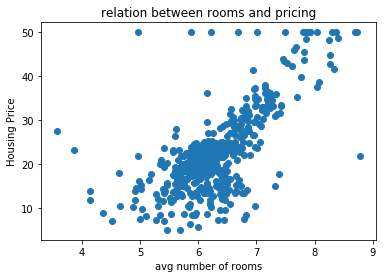

In [19]:
plot.scatter(bos.RM,bos.PRICE)
plot.xlabel("avg number of rooms")
plot.ylabel("Housing Price")
plot.title("relation between rooms and pricing")
plot.show()

In [20]:
lm.predict(X)[0:5]

array([30.00384338, 25.02556238, 30.56759672, 28.60703649, 27.94352423])

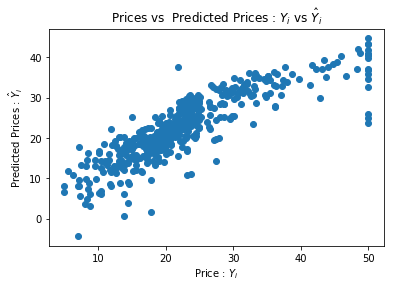

In [21]:
plot.scatter(bos.PRICE,lm.predict(X))
plot.xlabel("Price : $Y_i$")
plot.ylabel("Predicted Prices : $\hat{Y}_i$")
plot.title("Prices vs  Predicted Prices : $Y_i$ vs $\hat{Y}_i$")
plot.show()

In [22]:
mseFull = np.mean((bos.PRICE - lm.predict(X)) ** 2)
print(mseFull)

21.89483118172922


In [23]:
lm = LinearRegression()
lm.fit(X[["PTRATIO"]], bos.PRICE)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [24]:
msePTRATIO = np.mean((bos.PRICE - lm.predict(X[["PTRATIO"]])) ** 2)
print(msePTRATIO)

62.65220001376926


The mean squared error has increased. So this shows that a single feature is not a good predictor of housing prices.

In [25]:
X_train = X[:-50]
X_test = X[-50:]
Y_train = bos.PRICE[:-50]
Y_test = bos.PRICE[-50:]

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(456, 13)
(50, 13)
(456,)
(50,)


You can create training and test data sets manually, but this is not the right way to do, because you may be training your model on less expensive houses and testing on expensive houses.

In [27]:
X_train,X_test,Y_train,Y_test = sklearn.model_selection.train_test_split(X,bos.PRICE,test_size=0.33,random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(339, 13)
(167, 13)
(339,)
(167,)


In [28]:
lm = LinearRegression()
lm.fit(X_train,Y_train)
pred_train = lm.predict(X_train)
pred_test = lm.predict(X_test)

Then I calculate the mean squared error for training and test data.

In [34]:
print("Fit a model X_train, and calculate MSE with Y_train:",np.mean((Y_train - lm.predict(X_train))**2))

Fit a model X_train, and calculate MSE with Y_train: 19.546758473534663


In [35]:
print("Fit a model X_train, and calculate MSE with X_test,Y_test:",np.mean((Y_test - lm.predict(X_test))**2))

Fit a model X_train, and calculate MSE with X_test,Y_test: 28.53045876597468


So now fit a model X_train, and calculate MSE with Y_train: 19.5467584735 Fit a model X_train, and calculate MSE with X_test, Y_test: 28.5413672756

Text(0,0.5,'Residuals')

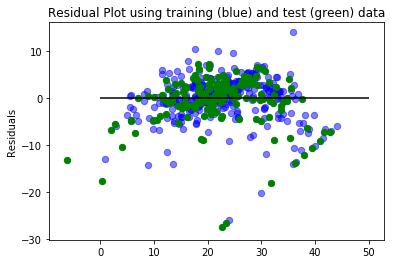

In [36]:
plot.scatter(lm.predict(X_train),lm.predict(X_train) - Y_train, c = 'b', s=40, alpha=0.5)
plot.scatter(lm.predict(X_test),lm.predict(X_test)-Y_test, c ='g', s=40)
plot.hlines(y=0, xmin = 0,xmax=50)
plot.title("Residual Plot using training (blue) and test (green) data")
plot.ylabel("Residuals")

### Residual Plots

Residual plots are a good way to visualize the errors in your data. If you have done a good job then your data should be randomly scattered around line zero. If you see structure in your data, that means your model is not capturing some thing. Maye be there is a interaction between 2 variables that you are not considering, or may be you are measuring time dependent data. If you get some structure in your data, you should go back to your model and check whether you are doing a good job with your parameters.

## Conclusion
To recap what I have done till now,

1.I explored the boston data set and then renamed its column names.<br/>
2.I explored the boston data set using .DESCR, my goal was to predict the housing prices using the given features.<br/>
3.I used Scikit learn to fit linear regression to the entire data set and calculated the mean squared error.<br/>
4.I made a train-test split and calculated the mean squared error for my training data and test data.<br/>
5.I then plotted the residuals for my training and test datasets.